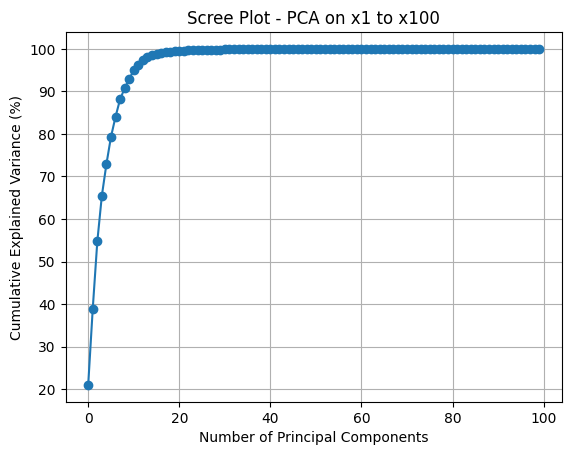

PC1: 20.97% variance explained
PC2: 17.96% variance explained
PC3: 15.78% variance explained
PC4: 10.78% variance explained
PC5: 7.43% variance explained
PC6: 6.40% variance explained
PC7: 4.73% variance explained
PC8: 4.11% variance explained
PC9: 2.57% variance explained
PC10: 2.23% variance explained


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Step 1: Read Excel file from path ---
# Replace with your actual path or filename
file_path = r"C:\Users\S Harikrishnan\OneDrive\Desktop\ds 203\Session-summary-2025-S1-TFIDF-E5 (1).xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

# --- Step 2: Select only x1 to x100 columns ---
# If your file has names like x_01, x_02, ... x_100
cols = [f"x_{str(i).zfill(2)}" for i in range(1, 101)]
# If instead they are x1, x2, ... x100, use:
# cols = [f"x{i}" for i in range(1, 101)]

X = data[cols]

# --- Step 3: Standardize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- Step 5: Explained variance ratios ---
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Scree Plot - PCA on x1 to x100")
plt.grid(True)
plt.show()

# Print first 10 PCs variance explained
for i, var in enumerate(explained_variance[:10], start=1):
    print(f"PC{i}: {var*100:.2f}% variance explained")


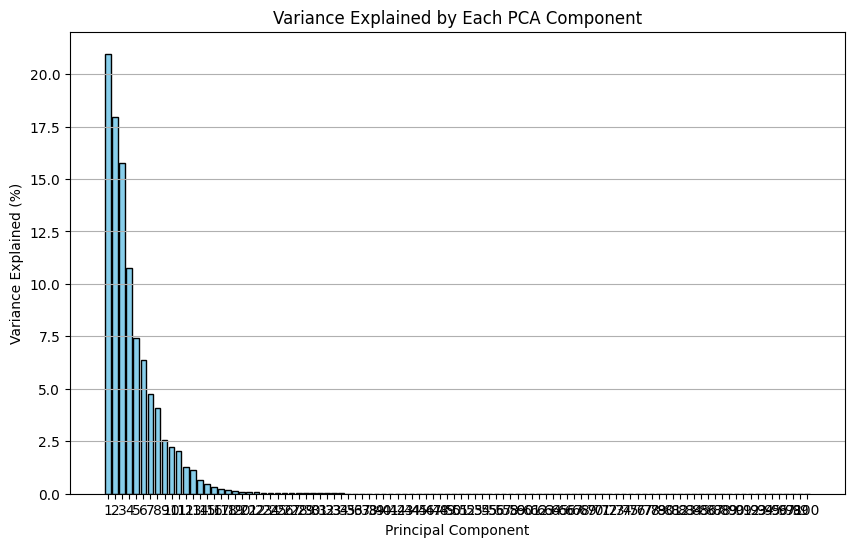

In [5]:
# --- Step 6: Histogram of variance explained by each PCA component ---
plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance*100, color='skyblue', edgecolor='black')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Variance Explained by Each PCA Component")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(axis='y')
plt.show()


In [6]:
import numpy as np

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Find number of PCs for 80% variance
num_pc_80 = np.argmax(cumulative_variance >= 0.80) + 1  # +1 because indices start at 0

# Find number of PCs for 90% variance
num_pc_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of principal components required to explain 80% variance: {num_pc_80}")
print(f"Number of principal components required to explain 90% variance: {num_pc_90}")


Number of principal components required to explain 80% variance: 7
Number of principal components required to explain 90% variance: 9


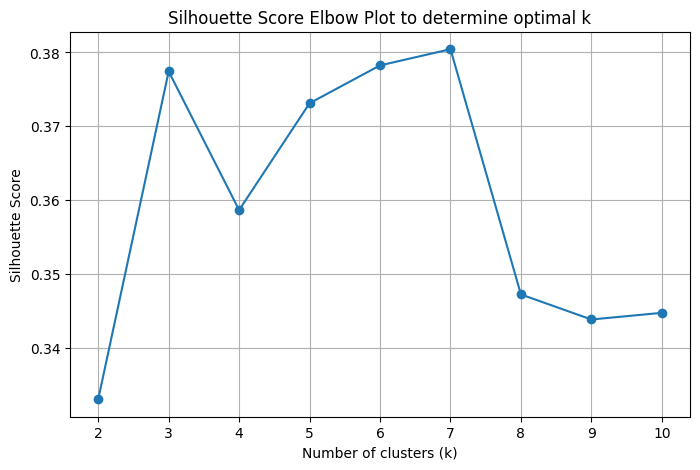

Optimal number of clusters based on Silhouette Score: 7


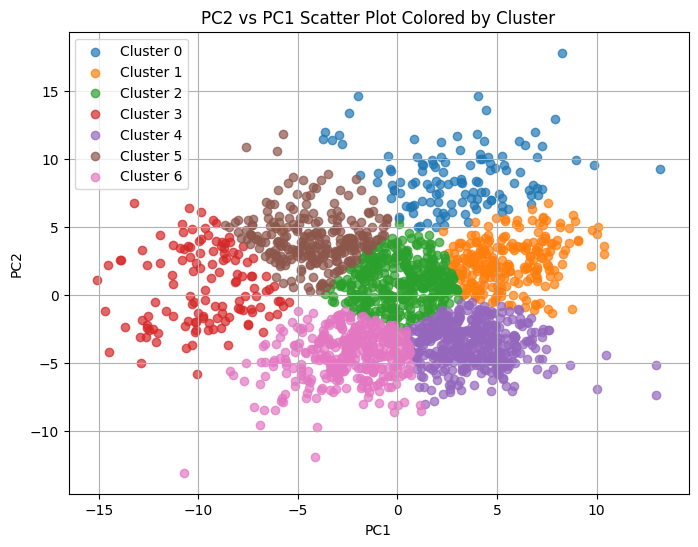


Cluster sizes:
PC_Cluster
4    407
6    361
2    355
5    256
1    238
3    127
0    122
Name: count, dtype: int64


In [9]:
# ===========================
# Step 6: Create DataFrame for first 2 principal components
# ===========================
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1','PC2'])
pca_df.head()

# ===========================
# Step 7: KMeans Clustering on PC1 and PC2
# ===========================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using Silhouette Score
sil_scores = []
K_range = range(2, 11)  # testing 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_df[['PC1','PC2']])
    score = silhouette_score(pca_df[['PC1','PC2']], labels)
    sil_scores.append(score)

# Elbow plot of silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Elbow Plot to determine optimal k")
plt.grid(True)
plt.show()

# Select optimal k
optimal_k = K_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

# Run KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df['PC_Cluster'] = kmeans.fit_predict(pca_df[['PC1','PC2']])

# ===========================
# Step 8: Scatter plot PC2 vs PC1 colored by cluster
# ===========================
plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    cluster_points = pca_df[pca_df['PC_Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC2 vs PC1 Scatter Plot Colored by Cluster")
plt.legend()
plt.grid(True)
plt.show()

# Optional: check cluster sizes
print("\nCluster sizes:")
print(pca_df['PC_Cluster'].value_counts())


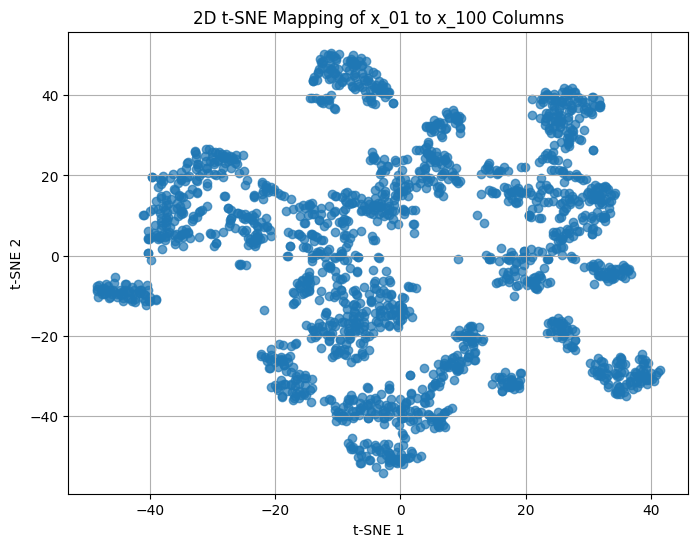

,tSNE1,tSNE2
0,31.706789,38.847118
1,25.142515,35.502464
2,22.829885,39.040874
3,-11.455534,-17.332380
4,25.240595,33.655746


In [18]:
# ===========================
# 2D t-SNE Mapping of x_01 to x_100
# ===========================

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Select x_01 to x_100 columns
cols = [f"x_{str(i).zfill(2)}" for i in range(1, 101)]
X = data[cols]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute 2D t-SNE embedding
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Create DataFrame for t-SNE coordinates
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])

# Step 5: Plot the 2D t-SNE mapping
plt.figure(figsize=(8,6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("2D t-SNE Mapping of x_01 to x_100 Columns")
plt.grid(True)
plt.show()

# Optional: inspect first few rows
tsne_df.head()


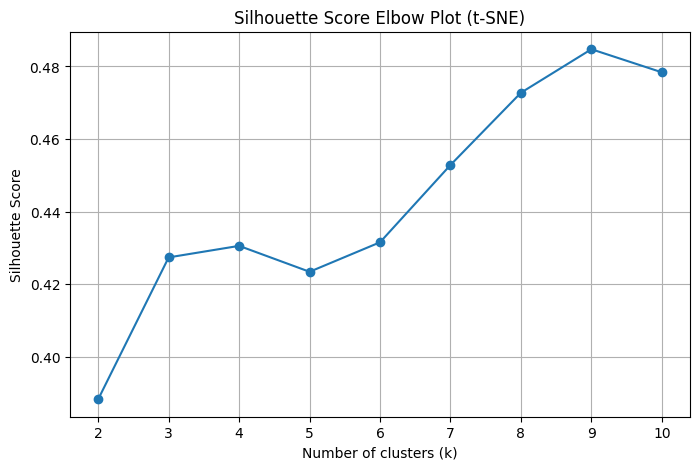

Optimal number of clusters based on Silhouette Score: 9


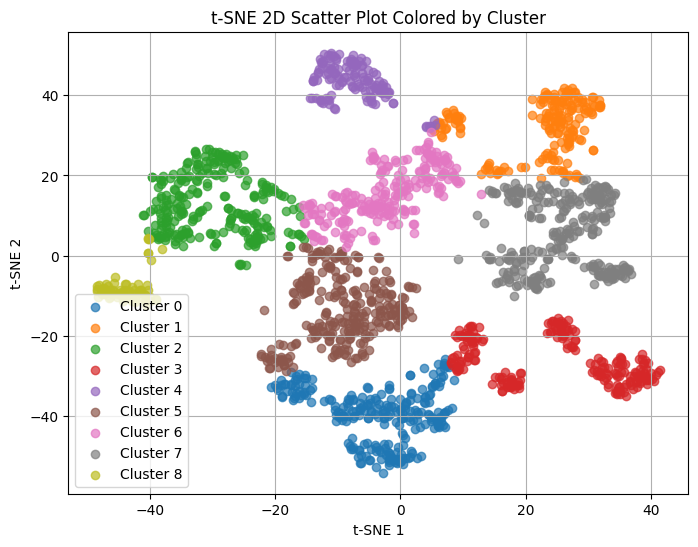


Cluster sizes:
TSNE_cluster
5    274
7    268
2    262
0    250
6    222
3    209
1    182
4    129
8     70
Name: count, dtype: int64


In [20]:
# ===========================
# KMeans Clustering on t-SNE 2D coordinates
# ===========================

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step a: Determine optimal number of clusters using Silhouette Score
sil_scores = []
K_range = range(2, 11)  # test 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(tsne_df[['tSNE1','tSNE2']])
    score = silhouette_score(tsne_df[['tSNE1','tSNE2']], labels)
    sil_scores.append(score)

# Plot silhouette score elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Elbow Plot (t-SNE)")
plt.grid(True)
plt.show()

# Find optimal k
optimal_k = K_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

# Step b: Run KMeans with optimal number of clusters and assign cluster labels
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
tsne_df['TSNE_cluster'] = kmeans.fit_predict(tsne_df[['tSNE1','tSNE2']])

# Step c: Scatter plot tSNE2 vs tSNE1 colored by cluster
plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    cluster_points = tsne_df[tsne_df['TSNE_cluster'] == cluster]
    plt.scatter(cluster_points['tSNE1'], cluster_points['tSNE2'], label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D Scatter Plot Colored by Cluster")
plt.legend()
plt.grid(True)
plt.show()

# Optional: print cluster sizes
print("\nCluster sizes:")
print(tsne_df['TSNE_cluster'].value_counts())


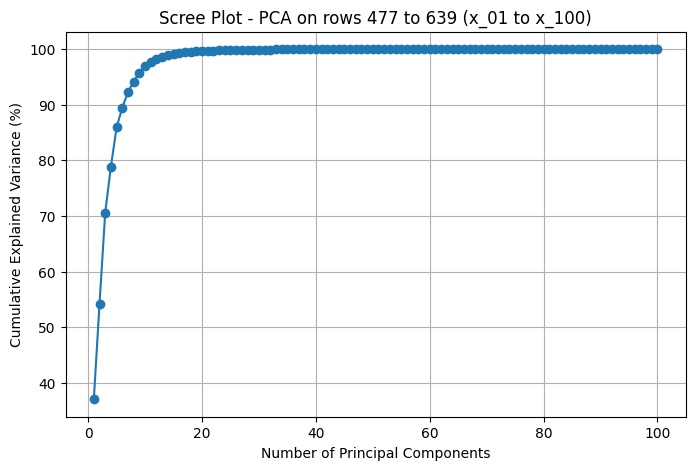

PC1: 37.02% variance explained
PC2: 17.19% variance explained
PC3: 16.41% variance explained
PC4: 8.27% variance explained
PC5: 7.06% variance explained
PC6: 3.55% variance explained
PC7: 2.75% variance explained
PC8: 1.93% variance explained
PC9: 1.61% variance explained
PC10: 1.19% variance explained


In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Select rows 477 to 639
# ---------------------------
subset_data = data.iloc[476:639, :]  # Python indexing: row 476 is 477th row

# Step 2: Select columns x_01 to x_100
cols = [f"x_{str(i).zfill(2)}" for i in range(1, 101)]
X_subset = subset_data[cols]

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Step 4: PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 5: Explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Step 6: Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Scree Plot - PCA on rows 477 to 639 (x_01 to x_100)")
plt.grid(True)
plt.show()

# Step 7: Print first 10 PCs variance explained
for i, var in enumerate(explained_variance[:10], start=1):
    print(f"PC{i}: {var*100:.2f}% variance explained")


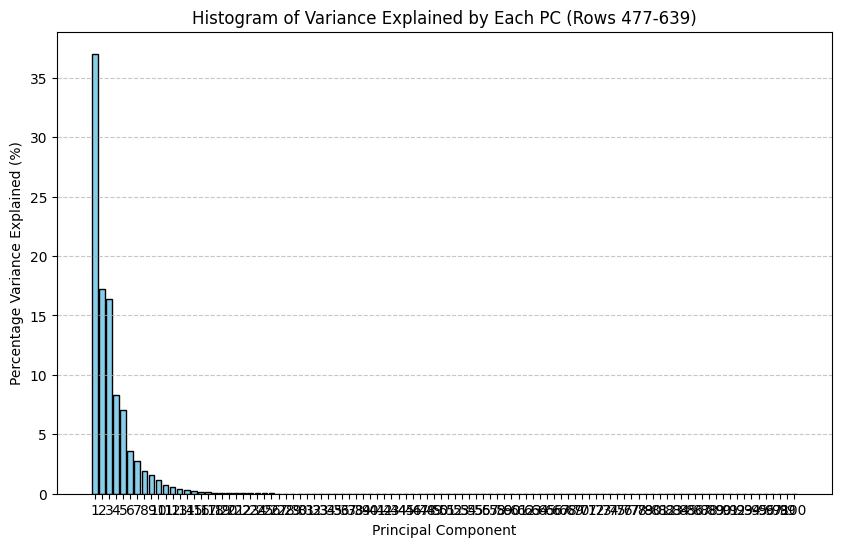

In [22]:
# ===========================
# Histogram of % variance explained
# ===========================

plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance*100, color='skyblue', edgecolor='black')
plt.xlabel("Principal Component")
plt.ylabel("Percentage Variance Explained (%)")
plt.title("Histogram of Variance Explained by Each PC (Rows 477-639)")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
import numpy as np

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Find number of PCs for 80% variance
pcs_80 = np.argmax(cumulative_variance >= 0.80) + 1  # +1 because index starts at 0
pcs_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of PCs required to explain 80% variance: {pcs_80}")
print(f"Number of PCs required to explain 90% variance: {pcs_90}")


Number of PCs required to explain 80% variance: 5
Number of PCs required to explain 90% variance: 7


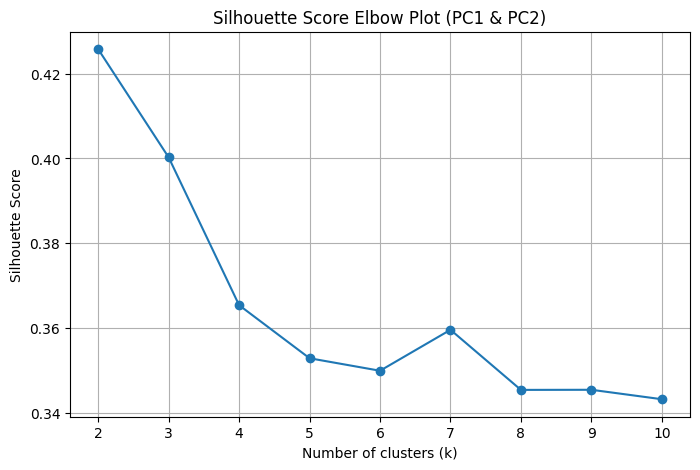

Optimal number of clusters: 2


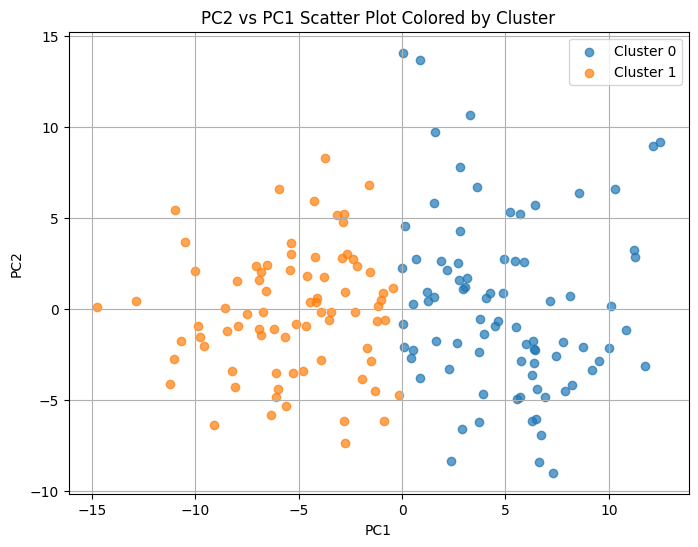


Cluster sizes:
PC_Cluster
0    84
1    79
Name: count, dtype: int64


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Step 1: Create DataFrame with PC1 and PC2
# ---------------------------
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1','PC2'])

# ---------------------------
# Step 2a: Determine optimal number of clusters using Silhouette Score
# ---------------------------
sil_scores = []
K_range = range(2, 11)  # testing 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_df[['PC1','PC2']])
    score = silhouette_score(pca_df[['PC1','PC2']], labels)
    sil_scores.append(score)

# Elbow plot based on silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Elbow Plot (PC1 & PC2)")
plt.grid(True)
plt.show()

# Select optimal k
optimal_k = K_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# ---------------------------
# Step 2b: Run KMeans with optimal clusters and assign cluster labels
# ---------------------------
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df['PC_Cluster'] = kmeans.fit_predict(pca_df[['PC1','PC2']])

# ---------------------------
# Step 2c: Scatter plot PC2 vs PC1 colored by cluster
# ---------------------------
plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    cluster_points = pca_df[pca_df['PC_Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f"Cluster {cluster}", alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC2 vs PC1 Scatter Plot Colored by Cluster")
plt.legend()
plt.grid(True)
plt.show()

# Optional: print cluster sizes
print("\nCluster sizes:")
print(pca_df['PC_Cluster'].value_counts())


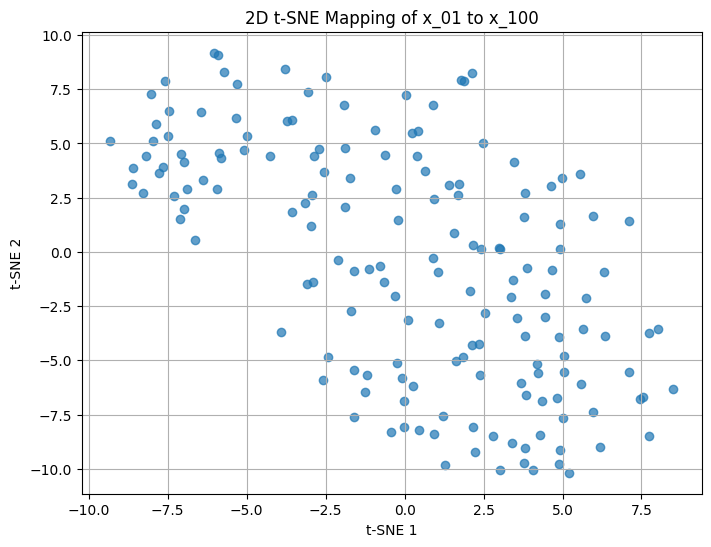

      TSNE1     TSNE2
0  5.647492 -3.548037
1 -1.591387 -7.605011
2 -2.891512 -1.385842
3 -8.293369  2.703576
4 -6.035410  9.183964


In [26]:
from sklearn.manifold import TSNE

# --- Step 1: Select x_01 to x_100 columns again ---
cols = [f"x_{str(i).zfill(2)}" for i in range(1, 101)]
X = data.loc[476:638, cols]   # rows 477–639 (Python indexing is 0-based)

# --- Step 2: Standardize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Compute 2D t-SNE embedding ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# --- Step 4: Create DataFrame for t-SNE coordinates ---
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# --- Step 5: Scatter plot of t-SNE mapping ---
plt.figure(figsize=(8,6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("2D t-SNE Mapping of x_01 to x_100")
plt.grid(True)
plt.show()

# Show first few rows
print(tsne_df.head())


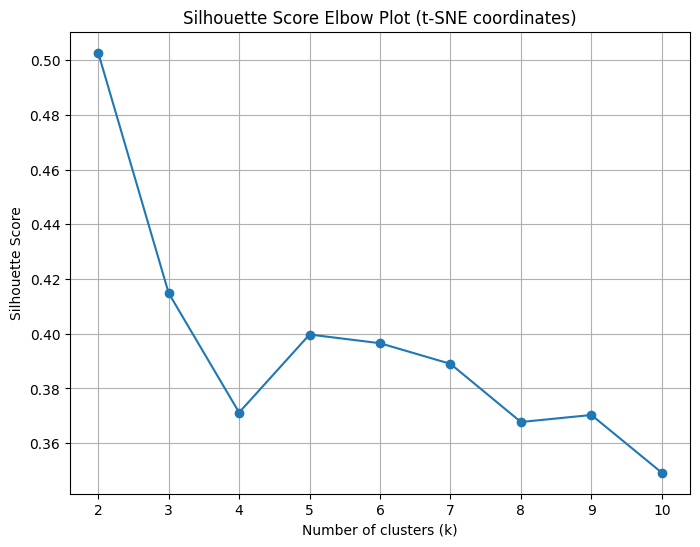

Best number of clusters based on silhouette score: 2


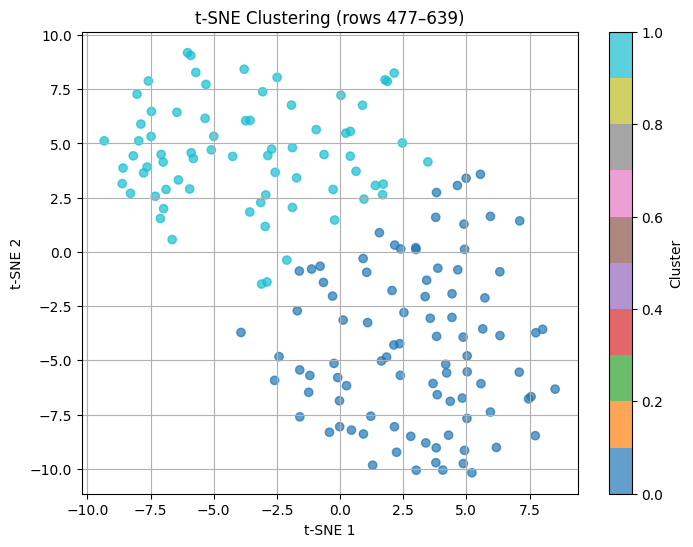

      TSNE1     TSNE2  TSNE_cluster
0  5.647492 -3.548037             0
1 -1.591387 -7.605011             0
2 -2.891512 -1.385842             1
3 -8.293369  2.703576             1
4 -6.035410  9.183964             1


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Step 1: Select rows 477–639 and columns x_01 to x_100 ---
cols = [f"x_{str(i).zfill(2)}" for i in range(1, 101)]
X = data.loc[476:638, cols]   # Python indexing

# --- Step 2: Standardize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Compute 2D t-SNE coordinates ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Create DataFrame with TSNE1, TSNE2
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# --- Step 4a: Find optimum number of clusters using silhouette scores ---
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(tsne_df[['TSNE1', 'TSNE2']])
    sil = silhouette_score(tsne_df[['TSNE1', 'TSNE2']], labels)
    sil_scores.append(sil)

# Plot silhouette score vs number of clusters
plt.figure(figsize=(8,6))
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Elbow Plot (t-SNE coordinates)")
plt.grid(True)
plt.show()

# --- Step 4b: Choose best k (highest silhouette score) ---
best_k = K[np.argmax(sil_scores)]
print("Best number of clusters based on silhouette score:", best_k)

# Fit KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
tsne_df['TSNE_cluster'] = kmeans.fit_predict(tsne_df[['TSNE1', 'TSNE2']])

# --- Step 4c: Scatter plot colored by clusters ---
plt.figure(figsize=(8,6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], 
            c=tsne_df['TSNE_cluster'], cmap='tab10', alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Clustering (rows 477–639)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Show first few rows with cluster assignment
print(tsne_df.head())
